<a href="https://colab.research.google.com/github/vinicius-mattoso/Exploratory-Data-Analysis-EDA-/blob/main/Memory_Test_on_Drugged_Islanders/Memory_Test_on_Drugged_Islanders_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Referências:
https://www.kaggle.com/shashwatwork/analysis-of-islanders-data/data

https://www.kaggle.com/miltonsuggs/06-memory-test-eda-clustering

Base de dados:
https://www.kaggle.com/steveahn/memory-test-on-drugged-islanders-data/code?datasetId=309887&sortBy=voteCount

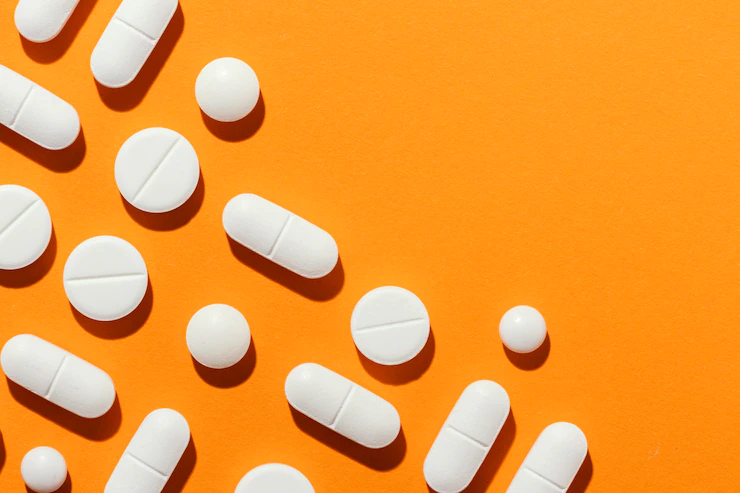

How does anti-anxiety medicine affect you differently by age?

Is there a level of plateauing ineffectiveness of anti-anxiety medicine - if so, at what point?

Effect of anti-anxiety medicine on memory recall?

Effectiveness of placebos in a test environment?

Como a medicina anti-ansiedade afeta você de forma diferente por idade?

Existe um nível de ineficácia de platô do medicamento anti-ansiedade - em caso afirmativo, em que ponto?

Efeito do medicamento anti-ansiedade na recuperação da memória?

Eficácia de placebos em um ambiente de teste?



Perguntas que podemos resolver com esses dados:

1- Existe alguma predominancia de remedios por idade?
  
  [  ] Para isso podemos fazer hist plot das idades segmentados por remedio;

  [  ] Isso serve para avaliar se existe grupos tendenciosos;

  
2- Como fica a distribuição do happy sad agrupados por idades?

[  ] Existe alguma idade que é mais critica para ser triste ou feliz?

3- quantas doses foram ministradas, existe alguma idade que tomou mais doses?


4- segregar por tipo de remedio:

   [  ] existe algum grupo que teve mais pessoas happy?
   [  ] como ficou a distribuição por tipo de remedio?
   [  ] Avaliar a distribuição do diff para cada tipo de remedio.

5- qual foi o ganho de cada remedio, para isso vamos medir a inclinação antes e depois de cada remedio.

6- Existe algum remedio mais indicado para alguma faixa etaria?



In [3]:
#importando a base de dados
import pandas as pd
import seaborn as sns

In [4]:
import pandas as pd
df=pd.read_csv('Islander_data.csv')

In [5]:
df.sample(10)

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
127,Sakura,McCarthy,45,H,3,S,56.9,58.9,2.0
181,Lukas,Castro,80,S,3,T,58.4,63.6,5.2
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
157,Dylan,Carrasco,83,H,2,T,44.2,44.5,0.3
172,Kevin,Steiner,32,H,2,T,77.8,72.2,-5.6
19,Justine,Summers,53,H,1,A,45.0,49.2,4.2
25,Dean,Carrasco,40,H,2,A,47.0,55.5,8.5
146,David,Lopez,29,H,1,T,40.7,39.0,-1.7
88,Karin,Bernard,33,S,1,S,46.7,46.0,-0.7
87,Rin,Takahashi,30,H,1,S,59.6,56.8,-2.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [7]:
df.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


In [8]:
df['Drug'].unique()

array(['A', 'S', 'T'], dtype=object)

In [9]:
df['Drug'].value_counts()

A    67
S    66
T    65
Name: Drug, dtype: int64

In [10]:
df['Happy_Sad_group'].value_counts()

H    99
S    99
Name: Happy_Sad_group, dtype: int64

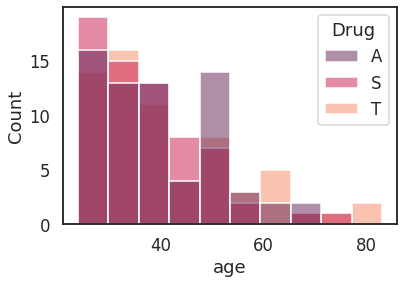

In [11]:
sns.color_palette("coolwarm", as_cmap=True)
sns.histplot(data=df, x="age", hue="Drug",palette='rocket')

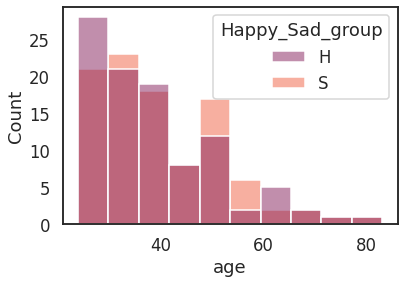

In [12]:
sns.color_palette("coolwarm", as_cmap=True)
sns.histplot(data=df, x="age", hue="Happy_Sad_group",palette='rocket')

In [13]:
happy=df.loc[df["Happy_Sad_group"] == 'H']
happy.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
7,Jamie,Durand,38,H,1,A,76.3,74.8,-1.5
8,Josefa,Durand,29,H,1,A,56.2,45.0,-11.2


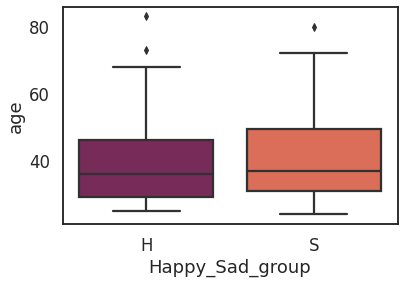

In [14]:
ax = sns.boxplot(x="Happy_Sad_group", y="age", data=df,palette='rocket')

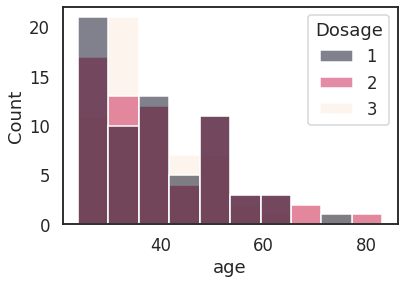

In [15]:
sns.color_palette("coolwarm", as_cmap=True)
sns.histplot(data=df, x="age", hue="Dosage",palette='rocket')

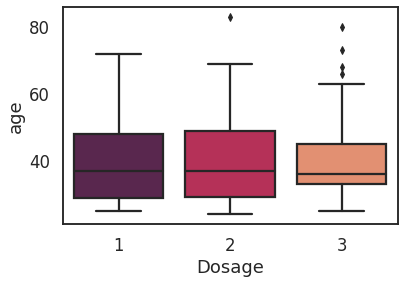

In [16]:
ax = sns.boxplot(x="Dosage", y="age", data=df,palette='rocket')

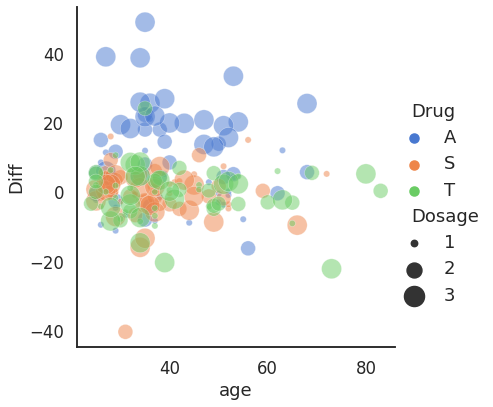

In [17]:
sns.relplot(x="age", y="Diff", hue="Drug", size="Dosage",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

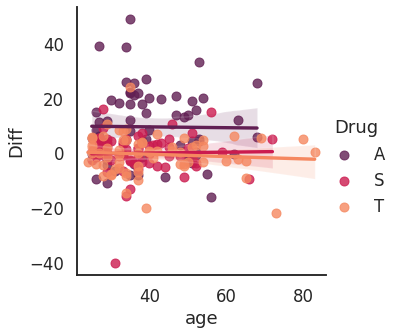

In [18]:
g = sns.lmplot(
    data=df,
    x="age", y="Diff", hue="Drug",
    height=5,palette='rocket'
)

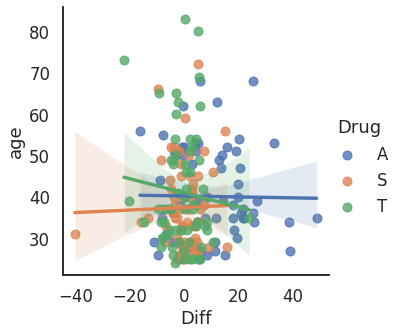

In [19]:
g = sns.lmplot(
    data=df,
    x="Diff", y="age", hue="Drug",
    height=5
)

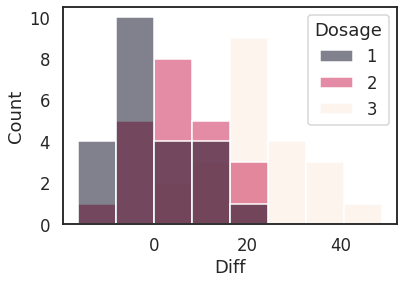

In [20]:
data=df.loc[df["Drug"] == 'A']
sns.color_palette("coolwarm", as_cmap=True)
sns.histplot(data=data, x="Diff", hue="Dosage",palette='rocket')

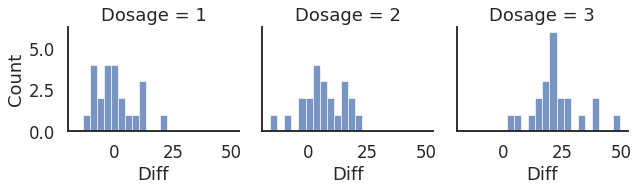

In [21]:
sns.displot(
    data, x="Diff", col="Dosage",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True)
)

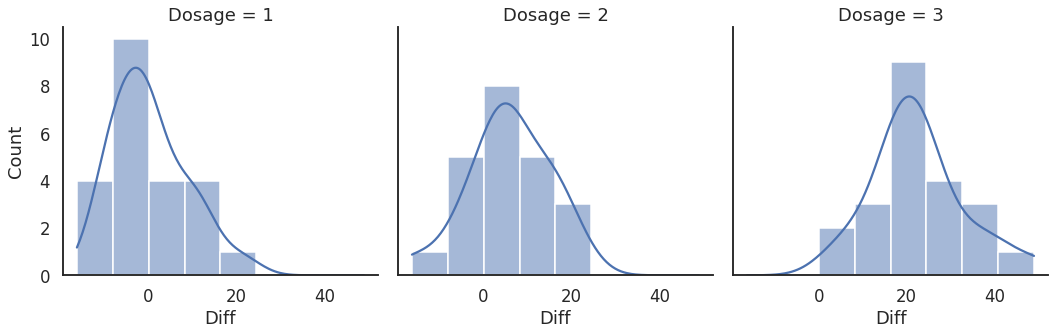

In [22]:
sns.displot(data=data, x="Diff", col="Dosage", kde=True, palette='rocket')

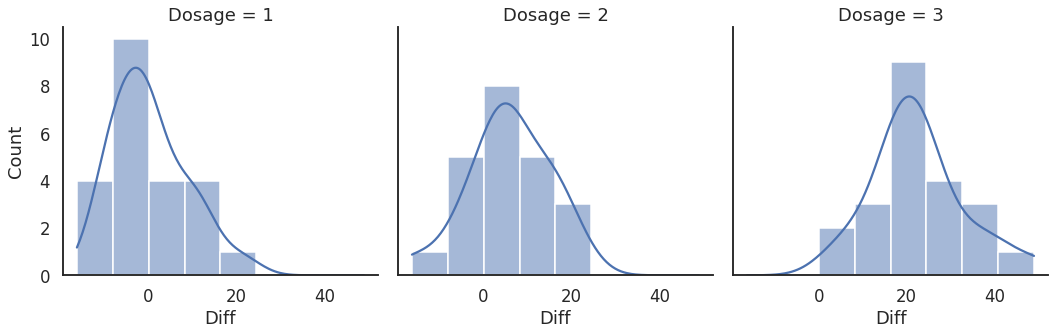

In [23]:
sns.displot(data=data, x="Diff", col="Dosage", kde=True, palette='rocket')

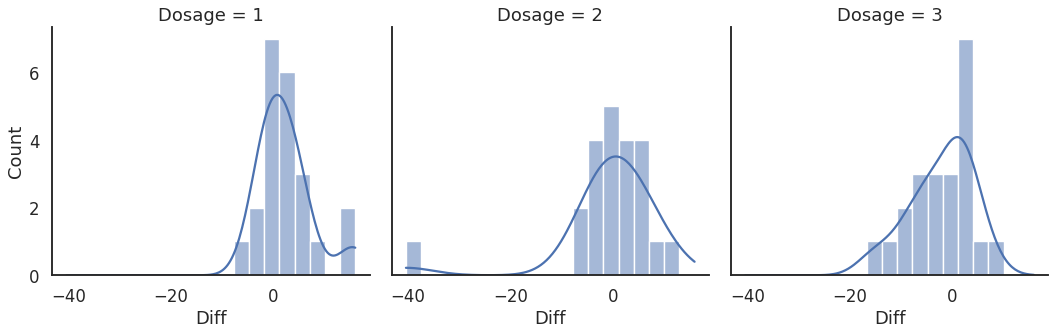

In [24]:
data=df.loc[df["Drug"] == 'S']
sns.displot(data=data, x="Diff", col="Dosage", kde=True, palette='rocket')

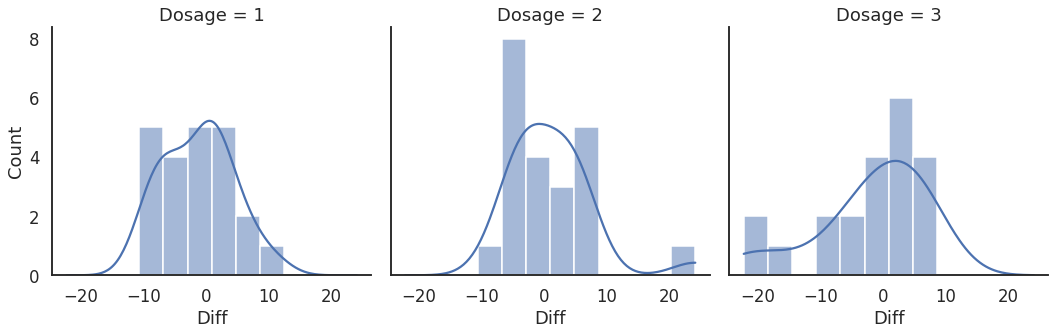

In [25]:
data=df.loc[df["Drug"] == 'T']
sns.displot(data=data, x="Diff", col="Dosage", kde=True, palette='rocket')

In [26]:
df.corr()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
age,1.000000,0.035107,0.066010,0.051879,-0.009293
Dosage,0.035107,1.000000,0.044149,0.171219,0.223979
Mem_Score_Before,0.066010,0.044149,1.000000,0.807528,-0.104366
Mem_Score_After,0.051879,0.171219,0.807528,1.000000,0.502330
Diff,-0.009293,0.223979,-0.104366,0.502330,1.000000


In [27]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
age,1.00,0.04,0.07,0.05,-0.01
Dosage,0.04,1.00,0.04,0.17,0.22
Mem_Score_Before,0.07,0.04,1.00,0.81,-0.10
Mem_Score_After,0.05,0.17,0.81,1.00,0.50
Diff,-0.01,0.22,-0.10,0.50,1.00


In [28]:
data_d3=df.loc[df["Dosage"] == 3]
data_d2=df.loc[df["Dosage"] == 2]
data_d1=df.loc[df["Dosage"] == 1]

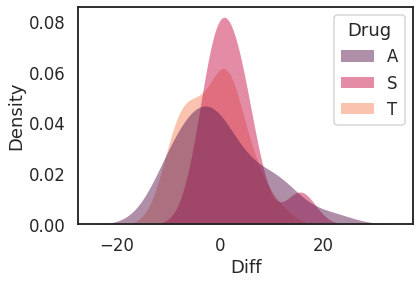

In [29]:
sns.kdeplot(
   data=data_d1, x="Diff", hue="Drug",
   fill=True, common_norm=False, palette='rocket',
   alpha=.5, linewidth=0,
)

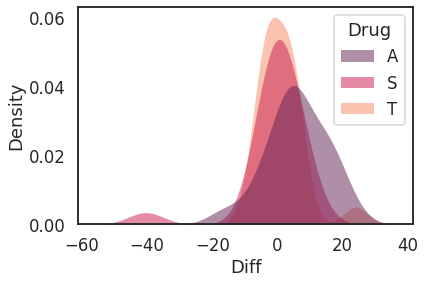

In [30]:
sns.kdeplot(
   data=data_d2, x="Diff", hue="Drug",
   fill=True, common_norm=False, palette='rocket',
   alpha=.5, linewidth=0,
)

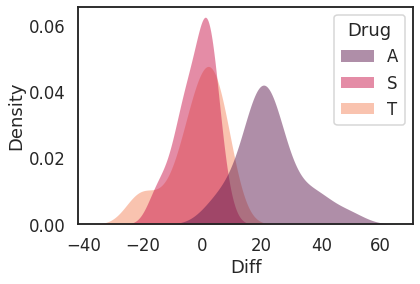

In [31]:
sns.kdeplot(
   data=data_d3, x="Diff", hue="Drug",
   fill=True, common_norm=False, palette='rocket',
   alpha=.5, linewidth=0,
)

Text(0.5, 1.0, 'Mem_Score_After')

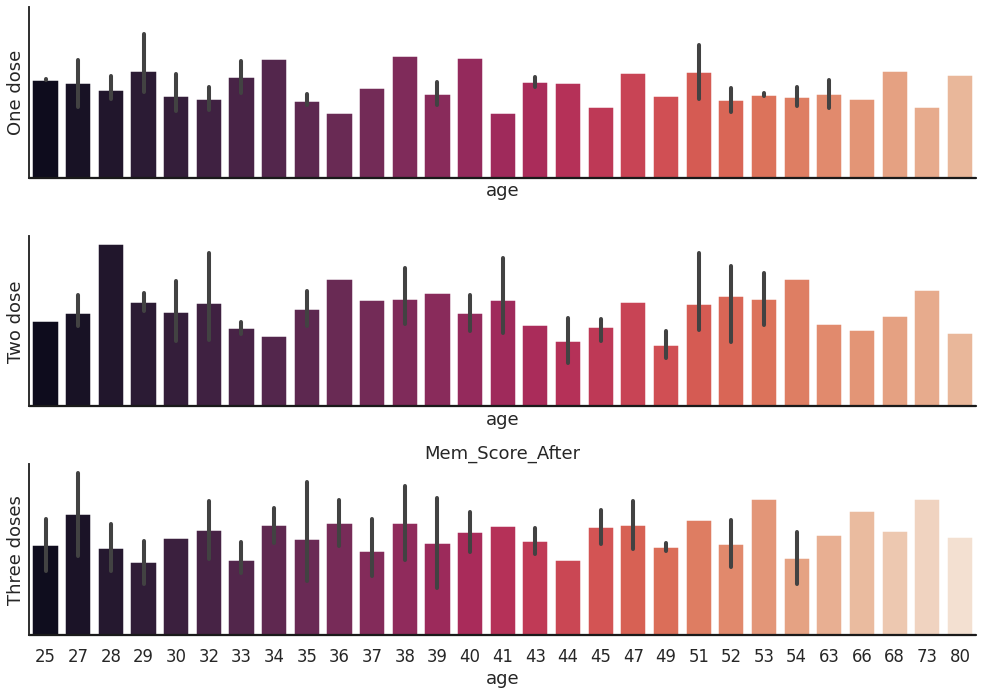

In [38]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Generate some sequential data
sns.barplot(x=data_d1['age'], y=data_d1['Mem_Score_After'], palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("One dose")

# Center the data to make it diverging
sns.barplot(x=data_d2['age'], y=data_d2['Mem_Score_After'], palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Two dose")

# Randomly reorder the data to make it qualitative
sns.barplot(x=data_d3['age'], y=data_d3['Mem_Score_After'], palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Three doses")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.title("Mem_Score_After")